**Importing the necessary libraries**

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**Importing the dataset**

In [48]:
data = pd.read_csv('student_performance_dataset.csv')
data.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


**Data preprocessing**

In [49]:
#dropping rows with missing values
data = data.dropna()

#encoding categorical variables
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Internet_Access_at_Home'] = data['Internet_Access_at_Home'].map({'Yes': 1, 'No': 0})
data['Extracurricular_Activities'] = data['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})
data['Pass_Fail'] = data['Pass_Fail'].map({'Pass': 1, 'Fail': 0})

In [50]:
data.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,1,31,68.267841,86,High School,1,1,63,1
1,S136,1,16,78.222927,73,PhD,0,0,50,0
2,S209,0,21,87.525096,74,PhD,1,0,55,0
3,S458,0,27,92.076483,99,Bachelors,0,0,65,1
4,S078,0,37,98.655517,63,Masters,0,1,70,1


**Visualization**

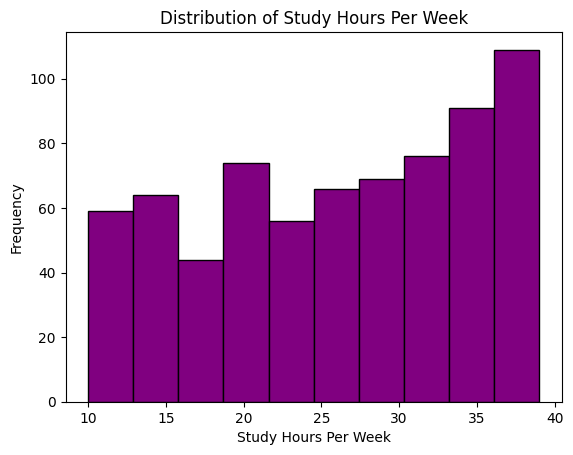

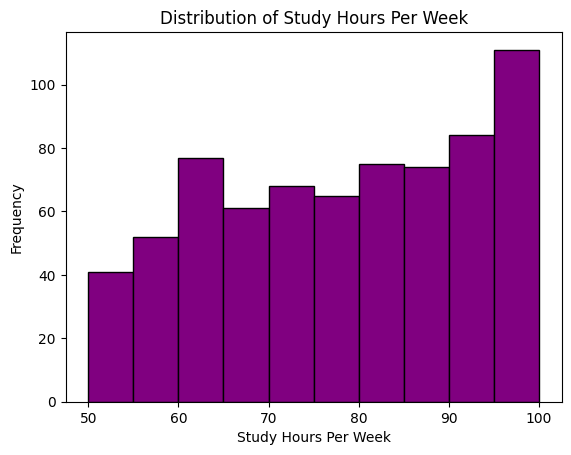

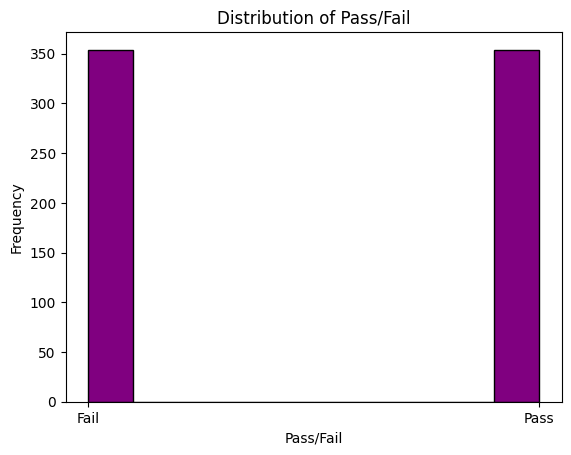

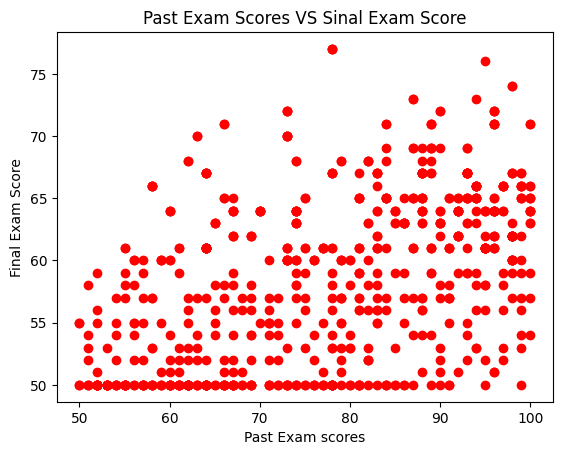

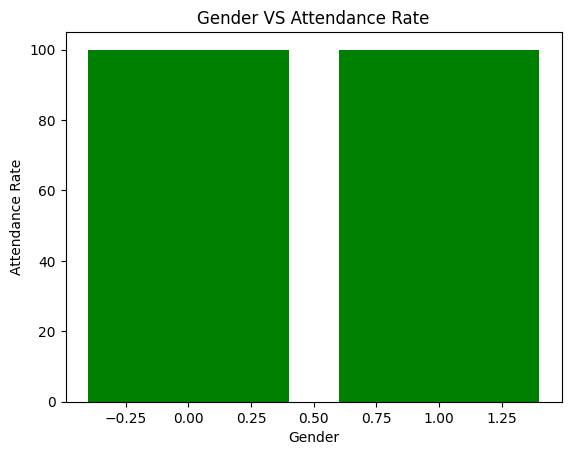

In [41]:
#The study hours per week distribution (histogram)
plt.hist(data['Study_Hours_per_Week'], bins=10, color='purple', edgecolor='black')
plt.title("Distribution of Study Hours Per Week")
plt.xlabel("Study Hours Per Week")
plt.ylabel("Frequency")
plt.show()

#Past exam scores distribution (histogram)
plt.hist(data['Past_Exam_Scores'], bins=10, color='purple', edgecolor='black')
plt.title("Distribution of Study Hours Per Week")
plt.xlabel("Study Hours Per Week")
plt.ylabel("Frequency")
plt.show()

#Pass/fail scores distribution (histogram)
plt.hist(data['Pass_Fail'], bins=10, color='purple', edgecolor='black')
plt.xticks([0, 1], ['Fail', 'Pass'])
plt.title("Distribution of Pass/Fail")
plt.xlabel("Pass/Fail")
plt.ylabel("Frequency")
plt.show()

#Plotting the past exam scores against the final exam score (scatter plot)
plt.scatter(data['Past_Exam_Scores'], data['Final_Exam_Score'], color='red')
plt.title("Past Exam Scores VS Sinal Exam Score")
plt.xlabel("Past Exam scores")
plt.ylabel("Final Exam Score")
plt.show()

#Gender against attendance rate (bar plot)
plt.bar(data['Gender'], data['Attendance_Rate'], color='green')
plt.title("Gender VS Attendance Rate")
plt.xlabel("Gender")
plt.ylabel("Attendance Rate")
plt.show()

**Selecting the relevant features**

In [51]:
x = data[['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Final_Exam_Score']]
y = data['Pass_Fail']

**Train-test split**

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=29)

**Training**

In [53]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

**Evaluation**

In [54]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.059911928233987354
R-squared (R2): 75.9923664366033
